### Шамсутдинов Рустам БВТ2201
### Практическая работа 8

#### Exercise 1

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Data from the table
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([2.2, 3.1, 4.1, 5.0, 5.8, 6.9, 7.8, 9.0, 10.2, 11.1])

# Number of data points
n = len(x)



In [9]:
# Task 1: Calculate b0, b1 using Formula 2
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x * y)
sum_x2 = np.sum(x ** 2)

b0 = (sum_y * sum_x2 - (sum_xy * sum_x)) / (n*sum_x2 - (sum_x * sum_x))  #eq 1
b1 = (sum_y * sum_x - (n*sum_xy)) / (sum_x * sum_x - (n * sum_x2)) #eq 2

# Calculate correlation coefficient r
x_mean = np.mean(x)
y_mean = np.mean(y)

Sx_2 = np.sum((x - x_mean)**2) / n
Sy_2 = np.sum((y- y_mean)**2) / n

Sx = np.sqrt(Sx_2)
Sy = np.sqrt(Sy_2)

r = b1 * (Sx/Sy) #eq 3

print(f"Task 1: Coefficients")
print(f"b0 (intercept): {b0:.4f}")
print(f"b1 (slope): {b1:.4f}")
print(f"Correlation coefficient (r): {r:.4f}")

Task 1: Coefficients
b0 (intercept): 1.0600
b1 (slope): 0.9927
Correlation coefficient (r): 0.9988


#### Exercise 2

In [10]:
# Task 2: Calculate D1 (variance)
f_x = b0 + b1 * x #linear regression equation


D1 = np.sum((y - f_x) ** 2) / (n - 2)

print(f"\nTask 2: Variance (D1): {D1:.4f}")


Task 2: Variance (D1): 0.0240


#### Exercise 3

In [11]:
# Task 3: Fisher test
n_for_S2 = 20

S2 = 0.1  # Given variance of random effects
F_calculated = D1 / S2



# Fisher critical value
alpha = 0.05
F_critical = f.ppf(1 - alpha, n - 2, n_for_S2 - 1)

print(f"\nTask 3: Fisher Test")
print(f"F_calculated: {F_calculated:.4f}")
print(f"F_critical: {F_critical:.4f}")
if F_calculated < F_critical:
    print("The variance D1 is not significantly different from S^2 (acceptable regression model).")
else:
    print("The variance D1 is significantly different from S^2 (model may not fit well).")


Task 3: Fisher Test
F_calculated: 0.2395
F_critical: 2.4768
The variance D1 is not significantly different from S^2 (acceptable regression model).


#### Exercise 4

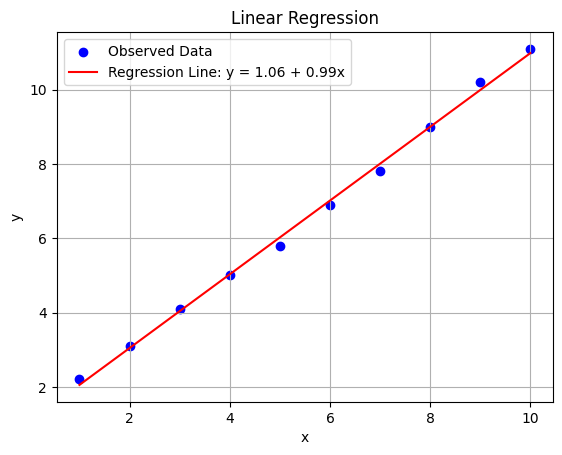

In [12]:
# Task 4: Plot graph
plt.scatter(x, y, label="Observed Data", color="blue")
plt.plot(x, f_x, label=f"Regression Line: y = {b0:.2f} + {b1:.2f}x", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.grid(True)
plt.show()



#### Exercise 5

In [13]:
# Task 5: Conclusion
print("\nTask 5: Conclusion")
if F_calculated < F_critical:
    print("The regression equation is suitable for further use.")
else:
    print("The regression equation is not suitable for further use.")


Task 5: Conclusion
The regression equation is suitable for further use.


#### Additional work

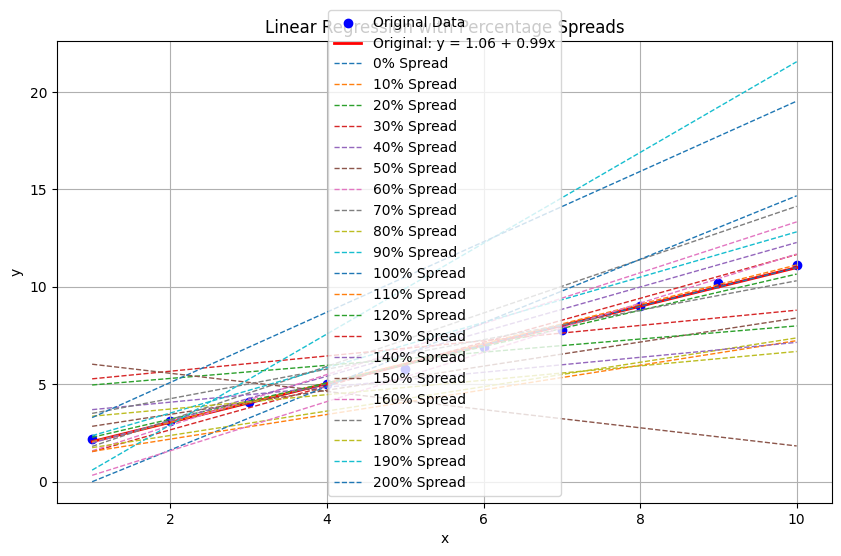

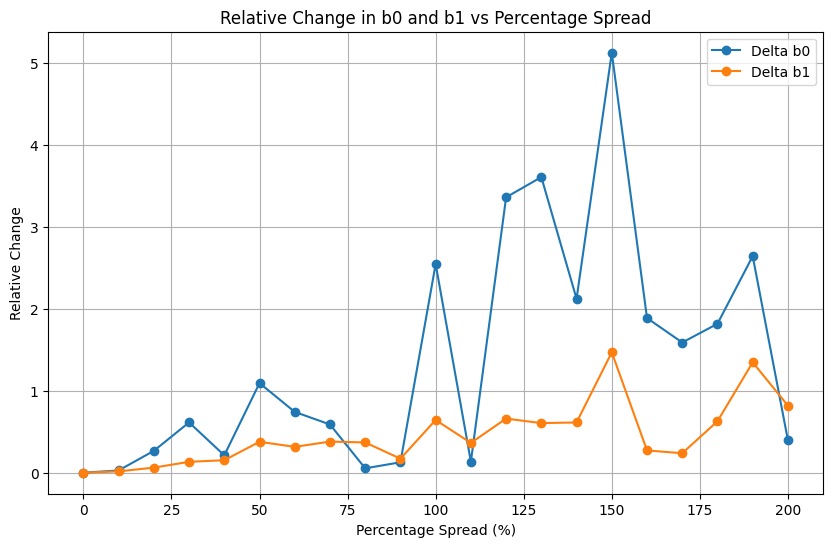

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Исходные данные
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([2.2, 3.1, 4.1, 5.0, 5.8, 6.9, 7.8, 9.0, 10.2, 11.1])

# Функция для вычисления коэффициентов b0 и b1
def calculate_b0_b1(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x2 = np.sum(x ** 2)
    sum_xy = np.sum(x * y)
    
    b1 = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
    b0 = (sum_y - b1 * sum_x) / n
    return b0, b1

# Вычисляем исходные b0 и b1
b0_orig, b1_orig = calculate_b0_b1(x, y)

# Диапазон процентов для разброса
percent_spreads = range(0, 201, 10)  # От 0% до 100% с шагом 10%
# percent_spreads = [20, 30, 40]

# Списки для хранения изменений коэффициентов
delta_b0 = []
delta_b1 = []

# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Original Data", color="blue")
plt.plot(x, b0_orig + b1_orig * x, label=f"Original: y = {b0_orig:.2f} + {b1_orig:.2f}x", color="red", linewidth=2)

# Генерация данных с разбросами и расчет новых b0, b1
for spread in percent_spreads:
    y_spread = np.array([yi + np.random.uniform(-yi * spread / 100, yi * spread / 100) for yi in y])  # Добавляем случайный разброс
    b0_new, b1_new = calculate_b0_b1(x, y_spread)  # Вычисляем новые коэффициенты

    # Вычисляем относительные изменения коэффициентов
    delta_b0.append(abs(b0_orig - b0_new) / abs(b0_orig))
    delta_b1.append(abs(b1_orig - b1_new) / abs(b1_orig))

    # Строим линии регрессии для наглядности
    plt.plot(x, b0_new + b1_new * x, label=f"{spread}% Spread", linestyle="--", linewidth=1)

# Добавляем подписи и легенду
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression with Percentage Spreads")
plt.legend()
plt.grid(True)
plt.show()

# Построение графиков изменений delta_b0 и delta_b1
plt.figure(figsize=(10, 6))
plt.plot(percent_spreads, delta_b0, label="Delta b0", marker='o')
plt.plot(percent_spreads, delta_b1, label="Delta b1", marker='o')

plt.xlabel("Percentage Spread (%)")
plt.ylabel("Relative Change")
plt.title("Relative Change in b0 and b1 vs Percentage Spread")
plt.legend()
plt.grid(True)
plt.show()
